<a href="https://colab.research.google.com/github/penkovgd/itmo-ml-course/blob/main/lab2_knn_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Инструменты для анализа и предобработки данных

Цель данной лабораторной работы - вспомнить инструментарий pandas, SQL и matplotlib для проведения анализа и предобработки данных.

С точки зрения машинного обучения в данной работе будет рассмотрен алгоритм kNN, алгоритм кластеризации kMeans, а также некоторые методы снижения размерности.

Датасет, с которым вам предстоит работать, содержит информацию о покупателях в одном из магазинов. Данные разделены на несколько файлов.
<br><br>
**people**

`id`: уникальный идентификатор клиента

`year_birth`: год рождения клиента

`education`: уровень образования клиента

`marital_status`: семейное положение клиента

`income`: годовой доход семьи клиента

`kidhome`: количество детей в доме клиента

`teenhome`: количество подростков в доме клиента

`dt_customer`: дата регистрации клиента в компании

`recency`: количество дней с момента последней покупки клиента

`complain`: 1, если клиент жаловался в последние 2 года, 0 в противном случае
<br><br>
**products**

`id`: уникальный идентификатор клиента

`mntwines`: сумма, потраченная на вино за последние 2 года

`mntfruits`: сумма, потраченная на фрукты за последние 2 года

`mntmeatproducts`: сумма, потраченная на мясные продукты за последние 2 года

`mntfishproducts`: сумма, потраченная на рыбу за последние 2 года

`mntsweetproducts`: сумма, потраченная на сладости за последние 2 года

`mntgoldprods`: сумма, потраченная на золото за последние 2 года
<br><br>
**purchases**

`id`: уникальный идентификатор клиента

`numwebpurchases`: количество покупок через веб-сайт компании

`numcatalogpurchases`: количество покупок с использованием каталога

`numstorepurchases`: количество покупок непосредственно в магазинах

`numwebvisitsmonth`: количество посещений веб-сайта компании в последний месяц

`numdealspurchases`: количество покупок скидочных товаров

In [ ]:
!gdown 1LUjAJR6hNs5IAnQscisvM2hUemvYRLWy
!unzip customers.zip

Downloading...
From: https://drive.google.com/uc?id=1LUjAJR6hNs5IAnQscisvM2hUemvYRLWy
To: /content/customers.zip
100% 66.6k/66.6k [00:00<00:00, 62.5MB/s]
Archive:  customers.zip
  inflating: products.csv            
  inflating: people.csv              
  inflating: purchases.csv           


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## pandas, sql

Прочитайте данные. Сколько строк и столбцов содержат таблицы? Есть ли в данных пропуски?

In [ ]:
people = pd.read_csv('people.csv', delimiter=';')
print(people.info())
people.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2240 non-null   int64  
 1   year_birth      2240 non-null   int64  
 2   education       2240 non-null   object 
 3   marital_status  2240 non-null   object 
 4   income          2216 non-null   float64
 5   kidhome         2240 non-null   int64  
 6   teenhome        2240 non-null   int64  
 7   dt_customer     2240 non-null   object 
 8   recency         2240 non-null   int64  
 9   complain        2240 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 175.1+ KB
None


,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0


In [ ]:
products = pd.read_csv('products.csv', delimiter='\t')
print(products.info())
products.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                2240 non-null   int64
 1   mntwines          2240 non-null   int64
 2   mntfruits         2240 non-null   int64
 3   mntmeatproducts   2240 non-null   int64
 4   mntfishproducts   2240 non-null   int64
 5   mntsweetproducts  2240 non-null   int64
 6   mntgoldprods      2240 non-null   int64
dtypes: int64(7)
memory usage: 122.6 KB
None


,id,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
0,5524,635,88,546,172,88,88
1,2174,11,1,6,2,1,6
2,4141,426,49,127,111,21,42


In [ ]:
purchases = pd.read_csv('purchases.csv')
print(purchases.info())
purchases.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   id                   2240 non-null   int64
 1   numdealspurchases    2240 non-null   int64
 2   numwebpurchases      2240 non-null   int64
 3   numcatalogpurchases  2240 non-null   int64
 4   numstorepurchases    2240 non-null   int64
 5   numwebvisitsmonth    2240 non-null   int64
dtypes: int64(6)
memory usage: 105.1 KB
None


,id,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth
0,5524,3,8,10,4,7
1,2174,2,1,1,2,5
2,4141,1,8,2,10,4


Каждое из следующих заданий необходимо выполнить двумя способами - с помощью pandas и с помощью SQL. Не используйте объединение таблиц через join/merge/concat.

In [ ]:
import sqlite3

conn = sqlite3.connect(':memory:')  # создание временной базы данных

people.to_sql('people', conn, index=False)
products.to_sql('products', conn, index=False)
purchases.to_sql('purchases', conn, index=False)

query = "SELECT * FROM people LIMIT 5;"
result = pd.read_sql_query(query, conn)
result

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0


### 1

Найдите абсолютную разницу между минимальным доходом клиентов с детьми и максимальным доходом клиентов без детей. Учитывайте только столбец `kidhome`.

In [ ]:
# pandas
min_income_kids = people[people.kidhome != 0]['income'].min()
max_income_no_kids = people[people.kidhome == 0]['income'].max()
diff = abs(min_income_kids - max_income_no_kids)
diff

158356.0

In [ ]:
# SQL
query = """ SELECT ABS(
                (SELECT MIN(income) FROM people WHERE kidhome != 0) -
                (SELECT MAX(income) FROM people WHERE kidhome == 0)
            ) as diff
        """
result = pd.read_sql_query(query, conn)
result

,diff
0,158356.0


### 2
Посчитайте процентное соотношение клиентов, имеющих PhD или другой уровень образования, среди клиентов, покупающих и не покупающих сладкое. Ответ представьте в виде:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        th, td {
            text-align: center;
            padding: 10px;
        }
        th {
            font-weight: bold;
        }
    </style>
</head>
<body>

<table border="1">
  <tr>
    <th></th>
    <th>PhD</th>
    <th>Other</th>
  </tr>
  <tr>
    <th>Sweets</th>
    <td>percentage</td>
    <td>percentage</td>
  </tr>
  <tr>
    <th>No Sweets</th>
    <td>percentage</td>
    <td>percentage</td>
  </tr>
</table>

</body>
</html>

Сумма по строке должна давать единицу.

In [ ]:
# PANDAS
phd = people[people.education == 'PhD'].id
other = people[people.education != 'PhD'].id

sweets = products[products['mntsweetproducts'] > 0].id
no_sweets = products[products['mntsweetproducts'] == 0].id

phd_sweets = phd.isin(sweets).sum() / sweets.size * 100
other_sweets = other.isin(sweets).sum() / sweets.size  * 100
phd_no_sweets = phd.isin(no_sweets).sum() / no_sweets.size  * 100
other_no_sweets = other.isin(no_sweets).sum() / no_sweets.size  * 100

result = pd.DataFrame([[phd_sweets, other_sweets],[phd_no_sweets, other_no_sweets]],
                        columns=['PhD', 'Other'], index=['Sweets', 'No Sweets'])
result

,PhD,Other
Sweets,18.286656,81.713344
No Sweets,36.515513,63.484487


In [ ]:
# SQL
sweets_query = "SELECT COUNT(*) FROM products WHERE mntsweetproducts > 0"
no_sweets_query = "SELECT COUNT(*) FROM products WHERE mntsweetproducts == 0"

phd_sweets_query = """SELECT COUNT(*)
                        FROM (
                            SELECT id FROM products WHERE mntsweetproducts > 0
                            INTERSECT
                            SELECT id FROM people WHERE education == 'PhD'
                        )
                    """
other_sweets_query = """SELECT COUNT(*)
                        FROM (
                            SELECT id FROM products WHERE mntsweetproducts > 0
                            INTERSECT
                            SELECT id FROM people WHERE education != 'PhD'
                        )
                    """
phd_no_sweets_query = """SELECT COUNT(*)
                        FROM (
                            SELECT id FROM products WHERE mntsweetproducts == 0
                            INTERSECT
                            SELECT id FROM people WHERE education == 'PhD'
                        )
                    """
other_no_sweets_query = """SELECT COUNT(*)
                        FROM (
                            SELECT id FROM products WHERE mntsweetproducts == 0
                            INTERSECT
                            SELECT id FROM people WHERE education != 'PhD'
                        )
                    """


sweets = pd.read_sql_query(sweets_query, conn).iloc[0,0]
no_sweets = pd.read_sql_query(no_sweets_query, conn).iloc[0,0]

phd_sweets = pd.read_sql_query(phd_sweets_query, conn).iloc[0,0] / sweets * 100
other_sweets = pd.read_sql_query(other_sweets_query, conn).iloc[0,0] / sweets * 100
phd_no_sweets = pd.read_sql_query(phd_no_sweets_query, conn).iloc[0,0] / no_sweets * 100
other_no_sweets = pd.read_sql_query(other_no_sweets_query, conn).iloc[0,0] / no_sweets * 100

result = pd.DataFrame([[phd_sweets, other_sweets],[phd_no_sweets, other_no_sweets]],
                        columns=['PhD', 'Other'], index=['Sweets', 'No Sweets'])
result

,PhD,Other
Sweets,18.286656,81.713344
No Sweets,36.515513,63.484487


## EDA

Изучите графики, которые предлагает построить Google Colab. Какие из них несут смысл, а какие выглядят бесполезными? На основании изученных графиков сформулируйте любую гипотезу по данным и постройте график, который поможет подтвердить или опровергнуть вашу гипотезу. Ваш график должен отличаться от уже представленных!

**people**

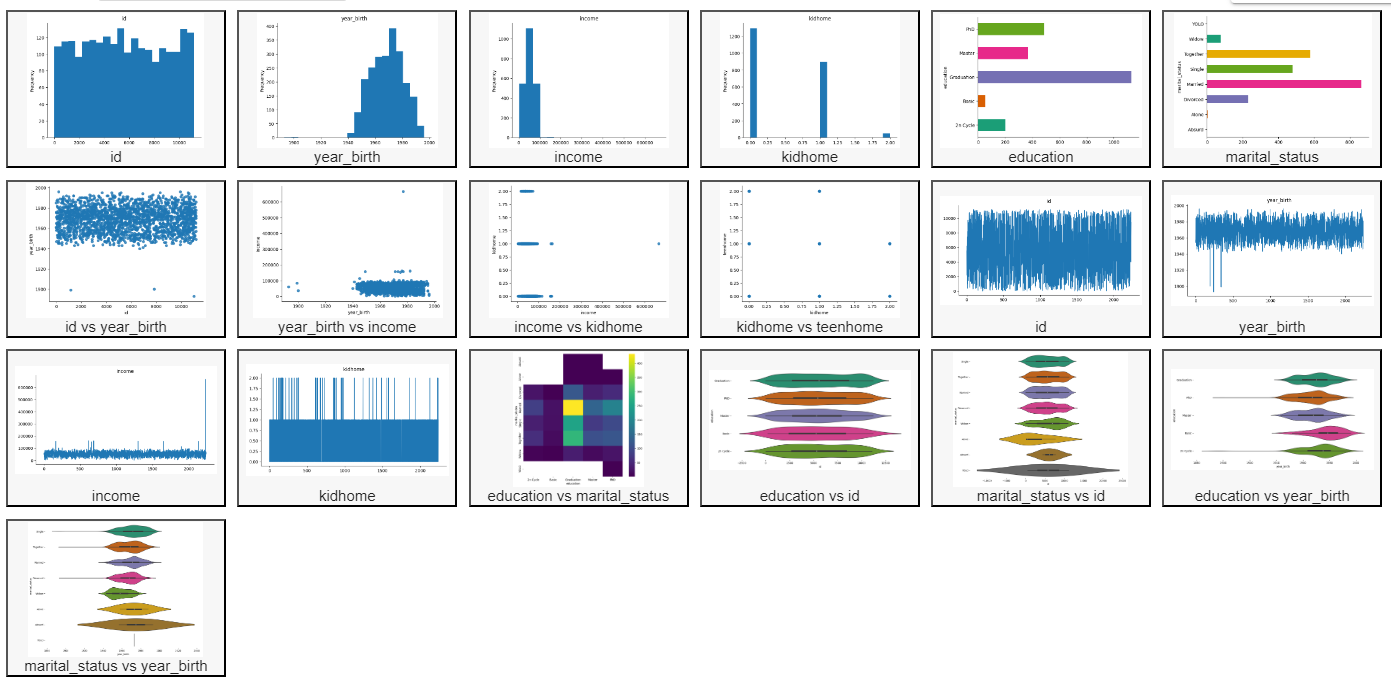

people.
- Полезные:
    2. распределение возрастов
    3. распределение доходов
    4. распредление/частоты kidhome (визуализация неудачная, но полезно)
    5. частоты категорий образования
    6. частоты категорий семейного положения
    8. year_birth vs income - полезен, видны выбросы
    9. income vs kidhome - потенциально полезен, если починить визуализацию
    15. heatmap education vs marital_status
    17. education vs year_birth
    18. marital_status vs year_birth


- Бесполезные:
    1. распределение id
    7. id vs year_birth
    10. kidhome vs teenhome
    11. id по index
    12. year_birth по index
    13. income по index
    14. kidhome по index
    15. education vs id
    16. martial_status vs id



**products**

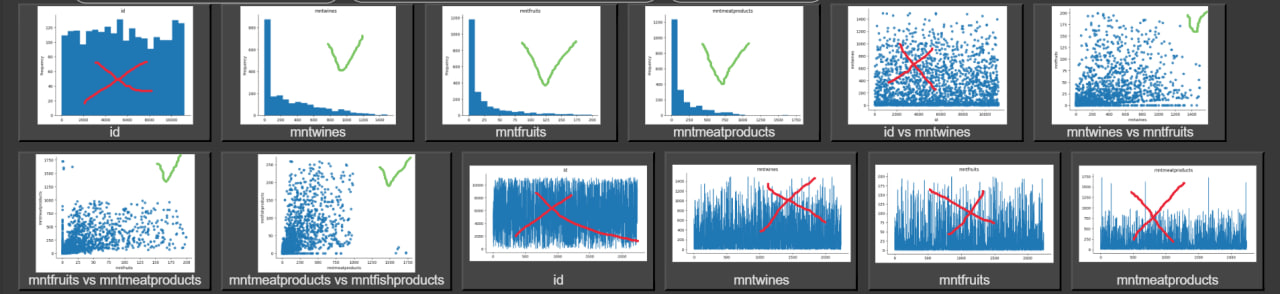

**purchases**

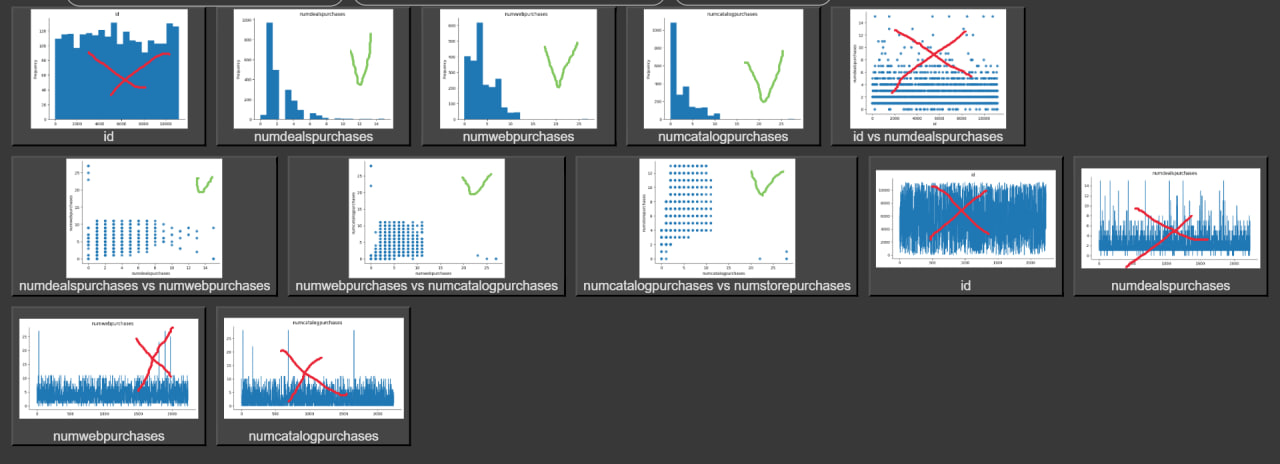

**Гипотеза**

Чем больше у клиента доход, тем больше он тратит на покупки, причем они больше покупают более дорогие категории товаров (вино, золото), чем другие.

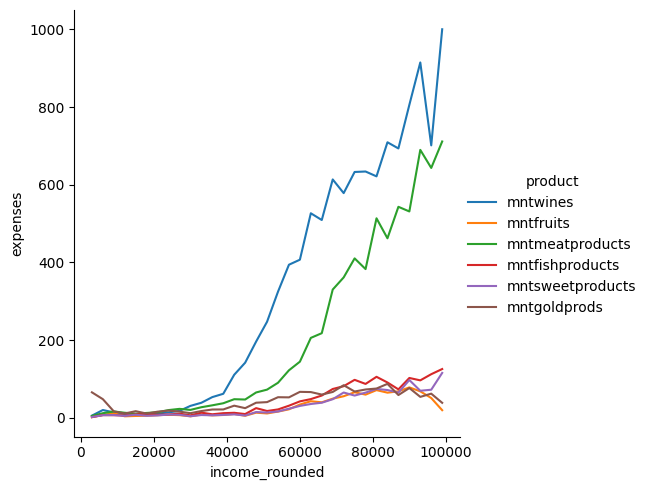

In [ ]:
import seaborn as sns

data = pd.merge(people[['id', 'income']], products, on='id')
data = data.drop('id', axis=1)
data = data.melt('income', var_name='product', value_name='expenses')
data['income_rounded'] = (data['income'] / 3000).round() * 3000
data
data = data.drop(data[(data.income > 10e4) | (data.index == 4501) ].index)

sns.relplot(data, x='income_rounded', y='expenses', hue='product', kind='line',
            errorbar=None)
plt.show()

По графику видно, что чем больше доход, то тем больше расходы на вино и мясо. На остальные категории более обеспеченные люди тратят не сильно больше. Насчет расходов на золото гипотеза не подтвердилась.

## Предобработка данных

Соберём разрозненные таблицы в одну (и порадуемся, что их объём позволяет это сделать). Как мы помним, в данных были пропуски.

In [ ]:
df = pd.merge(pd.merge(people, products, on='id'), purchases, on='id')
df.isna().sum()

,0
id,0
year_birth,0
education,0
marital_status,0
income,24
kidhome,0
teenhome,0
dt_customer,0
recency,0
complain,0


Не все алгоритмы машинного обучения умеют работать с пропусками в данных. Есть несколько стратегий для борьбы с пропусками, самая частая - заполнение пропусков модой, медианой или средним. Если пропусков слишком много, то имеет смысл выбросить соответствующую строку или столбец целиком.

Есть и более продвинутые методы, например kNN (K Nearest Neighbours). Суть данного метода заключается в том, что на основании известных признаков для объекта находятся "соседи", располагающиеся как можно ближе к исходному объекту в пространстве. Затем по этим объектам вычисляется значение недостающего признака.

Возникает два вопроса:

1. Каким образом представить объекты в пространстве?
2. Как считать расстояние между ними?

Ответ на оба — зависит от задачи. Объект обычно проще всего представить как вектор признаков. Для подсчета расстояния используются, например:
- евклидово расстояние и его общий случай (расстояние минковского);
- косинусное расстояние;
- манхэттенское расстояние
- расстояние Чебышёва;
- какое угодно, придуманное вами.

Реализуем kNN для восстановления пропущенных значений `income`. Будем считать евклидово расстояние между векторами. Сначала превратим каждую строку в числовой вектор. Для этого выполним следующие шаги:

* удалим столбец `id`

* проведём one-hot кодирование столбцов `education` и `marital_status`

* проведём нормировку (min-max scaling) столбца `dt_customer`

* проведём нормализацию (z-scaling) полученных векторов, потому что евклидово расстояние чувствительно к размерности признаков

Подумайте, почему именно такие преобразования являются необходимыми.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime

df_prep = df.copy()

# удаление id
df_prep.drop('id', axis=1, inplace=True)

# one-hot encoding
df_prep = pd.get_dummies(df_prep, columns=['education', 'marital_status'])

# minmax scaling. переведем даты в timestamp и масштабируем в отрезок [0,1]
dates = pd.to_datetime(df['dt_customer'], dayfirst=True)
dates = dates.apply(datetime.timestamp)
dates_minmax = MinMaxScaler().fit_transform(pd.DataFrame(dates))
df_prep['dt_customer'] = dates_minmax

# z-scaling всего датафрейма
df_prep = pd.DataFrame(StandardScaler().fit_transform(df_prep), columns=df_prep.columns)
print('mean: ', df_prep.mean().mean())
print('std: ', df_prep.std().mean())

mean:  -2.6754940685313385e-16
std:  1.0002233670863192


Допишите реализацию kNN.

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist


class CustomKNeighborsRegressor:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X = X
        self.y = y

    def kneighbors(self, X_test):
        result_distances = np.empty((X_test.shape[0], self.n_neighbors))
        result_indices = np.empty((X_test.shape[0], self.n_neighbors))

        distance_df = pd.DataFrame(cdist(X_test, self.X))
        for i, (_, distances) in enumerate(distance_df.iterrows()):
            nsmallest = distances.nsmallest(self.n_neighbors)
            result_distances[i] = nsmallest.values
            result_indices[i] = nsmallest.index
        return result_distances, result_indices.astype(int)


knn = CustomKNeighborsRegressor(n_neighbors=3)
knn.fit(df_prep.dropna().drop(columns='income'), df_prep.dropna())
distances, indices = knn.kneighbors(df_prep[df_prep['income'].isna()].drop(columns='income'))
distances, indices

(array([[0.44004779, 0.58442115, 0.89071522],
        [7.82420848, 8.81901802, 9.07809455],
        [2.49839201, 2.65320003, 2.86766642],
        [2.51926189, 2.51926189, 2.58346977],
        [0.        , 0.8150377 , 1.14109028],
        [1.59544646, 1.68180695, 1.75468736],
        [3.3479313 , 3.5894418 , 3.62767281],
        [1.16323772, 1.28157822, 1.75049403],
        [2.10336387, 2.46121667, 2.64994223],
        [0.        , 1.4067927 , 1.88354833],
        [2.87529898, 2.99108683, 3.06161025],
        [1.93005175, 3.31621328, 3.37650562],
        [2.89534908, 3.3870704 , 3.71154513],
        [1.53510808, 2.01321357, 2.01321357],
        [0.81998568, 1.34447894, 1.48522478],
        [1.07143663, 2.2065717 , 2.27257396],
        [0.        , 0.98424987, 1.21300376],
        [3.47137451, 4.57554732, 4.59202675],
        [0.        , 1.13977901, 1.26857042],
        [1.28603497, 1.43193338, 1.56277836],
        [1.50544229, 1.50544229, 1.5974574 ],
        [2.54062096, 2.91755617, 3

Если вы всё сделали правильно, то результаты должны совпасть с решением "из коробки", порядок возвращаемых соседей можно не учитывать.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(df_prep.dropna().drop(columns='income'), df_prep.dropna())
distances, indices = knn.kneighbors(df_prep[df_prep['income'].isna()].drop(columns='income'))
distances, indices

(array([[0.44004779, 0.58442115, 0.89071522],
        [7.82420848, 8.81901802, 9.07809455],
        [2.49839201, 2.65320003, 2.86766642],
        [2.51926189, 2.51926189, 2.58346977],
        [0.        , 0.8150377 , 1.14109028],
        [1.59544646, 1.68180695, 1.75468736],
        [3.3479313 , 3.5894418 , 3.62767281],
        [1.16323772, 1.28157822, 1.75049403],
        [2.10336387, 2.46121667, 2.64994223],
        [0.        , 1.4067927 , 1.88354833],
        [2.87529898, 2.99108683, 3.06161025],
        [1.93005175, 3.31621328, 3.37650562],
        [2.89534908, 3.3870704 , 3.71154513],
        [1.53510808, 2.01321357, 2.01321357],
        [0.81998568, 1.34447894, 1.48522478],
        [1.07143663, 2.2065717 , 2.27257396],
        [0.        , 0.98424987, 1.21300376],
        [3.47137451, 4.57554732, 4.59202675],
        [0.        , 1.13977901, 1.26857042],
        [1.28603497, 1.43193338, 1.56277836],
        [1.50544229, 1.50544229, 1.5974574 ],
        [2.54062096, 2.91755617, 3

Заполните пропуски в `income` средним значением по 3 ближайшим соседям.

In [ ]:
df_imputed = df_prep.copy()
for i, (index, row) in enumerate(df_imputed[df_imputed['income'].isna()].iterrows()):
    neighbors = df_imputed[df_imputed.index.isin(indices[i])]
    df_imputed.loc[df_imputed.index == index, 'income'] = neighbors.income.mean()

df_imputed.isna().sum().sum()

np.int64(0)

In [ ]:
df_prep['income'] = StandardScaler().fit_transform(df_prep[['income']])

## Кластеризация. Методы снижения размерности

In [ ]:
%%capture
!pip install umap-learn

Раз уж мы заговорили про поиск похожих между собой объектов, обсудим также кластеризацию.

[Кластеризация](https://ru.wikipedia.org/wiki/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7) - это один из видов задач обучения без учителя. Она заключается в разбиении всех объектов на группы похожих между собой объектов и сильно отличающихся от всех остальных. Так как строгого понятия похожести объектов нет, то алгоритмов кластеризации много, а результаты их работы могут сильно зависеть от качества входных данных и подобранных гиперпараметров.

Обсудим один из самых популярных методов кластеризации - [kMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Идея метода заключается в том, что на каждой итерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры согласно тому, какой из новых центроидов находится ближе.
Более формально, алгоритм принимает на вход выборку $X_1, \dots, X_N$ и параметр $k$, указывающий необходимое число кластеров. Выходом алгоритма является набор из $k$ центроидов $\{\mu_1, \dots, \mu_k\}$, с помощью которых кластеризация осуществляется путём отнесения каждого объекту к ближайшему центроиду. Все точки внутри одного кластера ближе к центроиду этого кластера, чем к центроиду любого другого кластера.
Метод может быть сформулирован как задача оптимизации, а именно, минимизации суммарного квадратичного отклонения точек кластеров от центров этих кластеров по центроидам и кластерам: $$\sum_{i=1}^k \sum_{X_n \in C_i} ||X_n - \mu_i||^2 \rightarrow \min, \text{где $C_i$ - это $i$-ый кластер, $\mu_i$ - это центр масс кластера $C_i$.}$$
Решение такой задачи оптимизации является NP-трудной задачей, однако существует простой итеративный алгоритм, позволяющий найти локальный минимум указанного функционала. Алгоритм представляет собой последовательное чередование двух шагов до сходимости.
Предположим, что как-то (например, случайно) выбраны начальные положения центроидов $\mu_1, \dots, \mu_k$.

1. Этап кластеризации. На данном этапе происходит кластеризация выборки, как было описано выше: каждый объект относится к кластеру ближайшего к нему центроида. Формально, $$C_i = \{X_n : ||X_n - \mu_i|| \leq ||X_n - \mu_j||, \text{ для всех $j \in \{1, \dots, k\}$}\}.$$

2. Этап обновления центроидов. На данном этапе центроиды пересчитываются, как центры масс только что построенных кластеров. Формально, $$\mu_i = \frac{1}{|C_i|}\sum_{X_n \in C_i} X_n.$$

Этот процесс продолжается, пока центроиды и кластеризация продолжают изменяться. Алгоритм гарантированно сходится, однако не гарантируется достижение глобального минимума, а только одного из локальных минимумов. Другим недостатком алгоритма является то, что итоговая кластеризация зависит от выбора исходных центров кластеров. На практике алгоритм запускается несколько раз из различных начальных приближений, а полученные результаты некоторым образом усредняются. Стоит также отметить, что число кластеров необходимо знать заранее. Существуют различные эвристики, позволяющие выбирать в некотором смысле оптимальное число кластеров.

_определение взято из материалов курса [ODS](https://habrahabr.ru/company/ods/)_


Посмотрим, что будет давать реализация алгоритма "из коробки" на наших данных. Возьмем только данные из таблицы продуктов.


In [ ]:
X = StandardScaler().fit_transform(products.drop(columns='id'))

Сначала нужно определиться с количеством кластеров. Для этого можно воспользоваться "методом локтя" - мы рeшаем задачу кластеризации несколько раз с разным количеством кластеров и выбираем то минимальное количество кластеров, после которого существенного улучшения не происходит. Ориентироваться будем на две метрики - kMeans.inertia_ и Silhouette Score.

**kMeans.inertia_** отражает сумму расстояний от каждой точки до центра ее кластера, возведенных в квадрат. Это значение также известно как сумма внутрикластерных квадратов (Within-Cluster Sum of Squares, WCSS). Математически инерция выражается следующим образом:

$ Inertia = \sum_{i=0}^{n}(min_{\mu_j \in C}(||x_i - \mu_j||^2)) $

Где $x_i$ - это i-й элемент выборки, $\mu_j$ - это центроид кластера $C$, а $||x_i - \mu_j||$ обозначает Евклидово расстояние между точкой $x_i$ и центроидом $\mu_j$. Инерция показывает, насколько плотно группируются объекты внутри кластеров: чем меньше значение инерции, тем ближе объекты находятся к центроидам своих кластеров.

**Silhouette Score** (Силуэт) рассчитывается как разница между средним расстоянием до объектов других кластеров (b) и средним расстоянием до объектов в том же кластере (a), деленная на максимальное из этих значений:

$s = \frac{b - a}{max(a, b)}$

Где $a$ - это среднее расстояние от объекта до других объектов в том же кластере, а $b$ - это минимальное среднее расстояние от объекта до объектов в других кластерах. Значение силуэта лежит в диапазоне от -1 до 1, где высокий положительный счет указывает на то, что объект хорошо соответствует своему кластеру и плохо соответствует соседним кластерам. Обычно, чем выше средний силуэт для всех объектов, тем лучше структурированы кластеры.

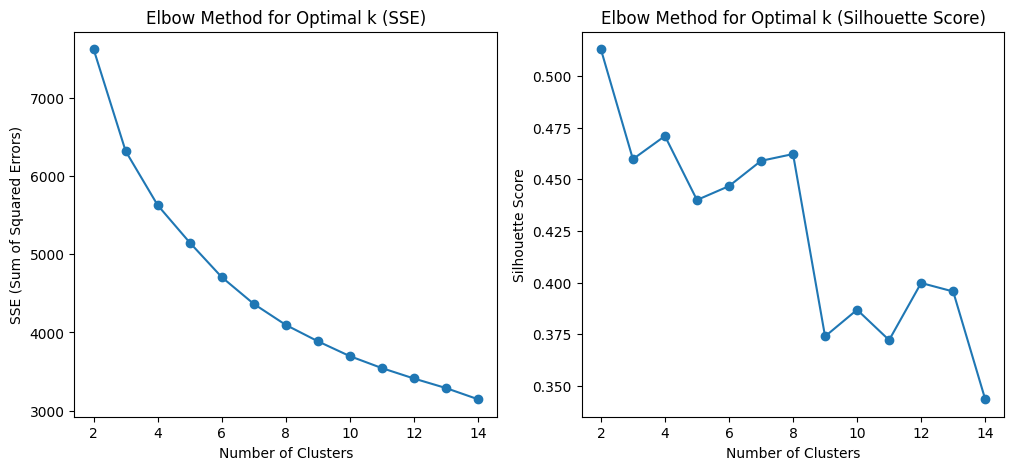

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


xaxs = list(range(2, 15))
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "random_state": 42,
    "algorithm": "lloyd"
}

silhouette_scores = []
sse = []

for k in xaxs:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 5))

# SSE
plt.subplot(1, 2, 1)
plt.plot(xaxs, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal k (SSE)')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(xaxs, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal k (Silhouette Score)')

plt.show()

4 кластера выглядит хорошо. 8 тоже.

In [ ]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(X)
cluster_labels = kmeans.labels_
cluster_labels.shape

(2240,)

Посмотрим на то, что получается. 6-мерный вектор будет проблематично отобразить на плоскости, поэтому прибегнем к снижению размерности - переходом в меньшее по количеству измерений признаковое пространство. Рассмотрим три подхода, имеющих реализацию "из коробки" - PCA, t-SNE, UMAP.

**PCA (метод главных компонент)** - это линейный алгоритм, который используется для уменьшения размерности данных путем проекции их на пространство меньшей размерности, сохраняя при этом максимальное количество информации в данных. Это достигается путем определения новых осей (главных компонент), которые направлены в сторону максимальной дисперсии данных. Первая главная компонента имеет наибольшую дисперсию, вторая - максимальную дисперсию среди оставшихся компонент и так далее. Для выбора количества главных компонент часто используют критерий, основанный на объясненной дисперсии, то есть на той доле общей дисперсии, которую объясняют выбранные компоненты.

**t-SNE (Стохастическое вложение соседей с t-распределением)** - это нелинейный алгоритм, который работает на основе вероятностных распределений: в многомерном пространстве данные моделируются так, что похожие объекты имеют высокую вероятность быть "соседями", в то время как непохожие объекты - низкую. Эти вероятности затем используются для определения расположения объектов в пространстве уменьшенной размерности таким образом, чтобы структура данных оставалась похожей. Чем-то напоминает kNN.


**UMAP (Uniform Manifold Approximation and Projection)** - это современный алгоритм уменьшения размерности, который можно считать конкурентом t-SNE. Он также основан на концепции многомерного многообразия, но использует другой математический подход, основанный на топологии. UMAP стремится сохранить глобальную структуру данных, в отличие от t-SNE, который фокусируется больше на локальной.

[Немного красивых картинок](https://habr.com/ru/companies/newprolab/articles/350584/)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


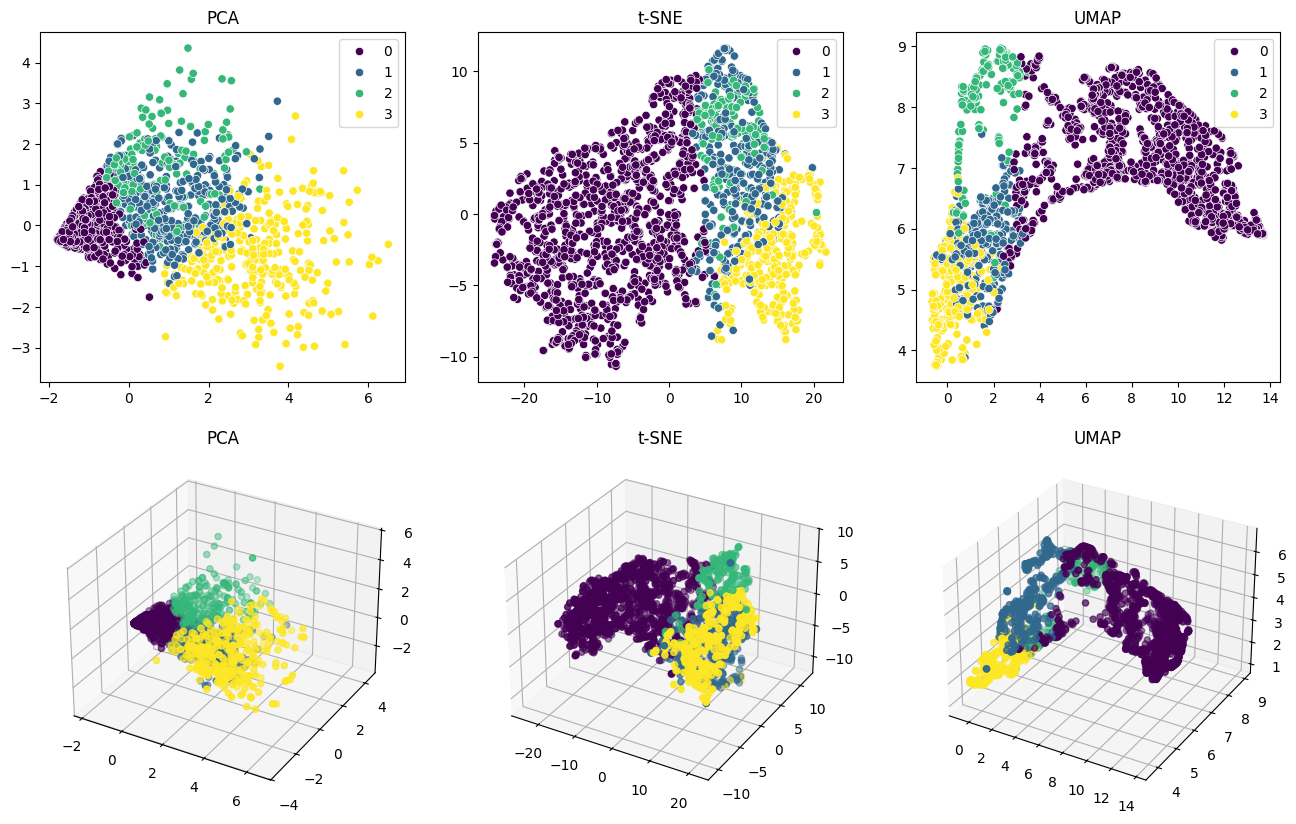

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=3)
tsne = TSNE(n_components=3, random_state=42)
umap = UMAP(n_components=3, random_state=42)

pca_result = pca.fit_transform(X)
tsne_result = tsne.fit_transform(X)
umap_result = umap.fit_transform(X)

plt.figure(figsize=(16, 10))

# 2D Plots
plt.subplot(2, 3, 1)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=cluster_labels, palette='viridis')
plt.title('PCA')

plt.subplot(2, 3, 2)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=cluster_labels, palette='viridis')
plt.title('t-SNE')

plt.subplot(2, 3, 3)
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], hue=cluster_labels, palette='viridis')
plt.title('UMAP')

# 3D Plots
ax1 = plt.subplot(2, 3, 4, projection='3d')
ax1.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=cluster_labels, cmap='viridis')
ax1.set_title('PCA')

ax2 = plt.subplot(2, 3, 5, projection='3d')
ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=cluster_labels, cmap='viridis')
ax2.set_title('t-SNE')

ax3 = plt.subplot(2, 3, 6, projection='3d')
ax3.scatter(umap_result[:, 0], umap_result[:, 1], umap_result[:, 2], c=cluster_labels, cmap='viridis')
ax3.set_title('UMAP')

plt.show()

В целом, все кластеры не сильно перекрывают друг друга (за исключением 1 и 2). Т.е. 1 и 2 могут быть похожи друг на друга.

Попробуйте проинтерпретировать получающиеся результаты.

In [ ]:
products['cluster_labels'] = cluster_labels
products['cluster_labels'].value_counts()

,count
cluster_labels,
0,1297
1,392
3,347
2,204


большинсво принадлежат кластеру 0, а в кластере 2 наименьшее кол-во клиентов.

In [ ]:
cluster_means = products.drop(columns='id').groupby('cluster_labels').mean()
cluster_means.style.background_gradient(cmap='Blues', axis=0)  # можно ли сказать, что у нас есть кластер любителей вина?..

,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
cluster_labels,,,,,,
0,96.339244,6.353123,35.407864,8.926754,6.353123,17.320740
1,717.056122,35.826531,366.737245,53.158163,35.084184,39.551020
2,472.176471,25.730392,169.426471,32.328431,25.029412,143.426471
3,514.276657,90.443804,431.469741,129.815562,96.605187,90.435159


Получается, можно описать получившиеся кластеры так:

0 - основная масса клиентов, которая немного тратит на все продукты

1 - любители вина и мяса, на остальные продукты так же тратит больше денег, чем кластер 0

2 - покупатели золота. тоже покупают вино и мясо, но меньше, чем кластер 1, но в целом тратят больше, чем 0

3 - клиенты, тратящие много денег примерно на все категории товаров. Покупают меньше вина, чем 1, и меньше золота, чем 2.

В целом можно согласится, что категория 1 похожа на 2, как это было показано на scatter графиках.

### Задание

В предыдущем пункте работы мы применили готовый код для кластеризации, чтобы увидеть, как она работает. Теперь ваша задача - написать код для реализации алгоритма kMeans самостоятельно (речь, конечно, идет о намного менее, нежели версия "из коробки", оптимизированной версии алгоритма).

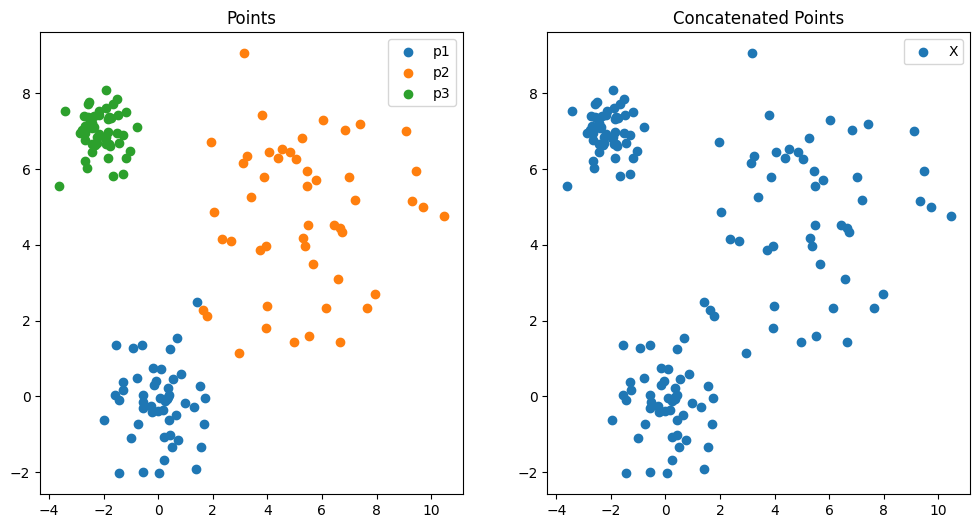

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# игрушечные данные
p1 = np.random.normal(loc=0, scale=1, size=(50,2))
p2 = np.random.normal(loc=5, scale=2, size=(50,2))
p3 = np.random.normal(loc=3, scale=0.6, size=(50,2)) - np.array([5, -4])
X = np.concatenate((p1, p2, p3))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(p1[:, 0], p1[:, 1], label='p1')
axs[0].scatter(p2[:, 0], p2[:, 1], label='p2')
axs[0].scatter(p3[:, 0], p3[:, 1], label='p3')
axs[0].set_title('Points')
axs[0].legend()

axs[1].scatter(X[:, 0], X[:, 1], label='X')
axs[1].set_title('Concatenated Points')
axs[1].legend()

plt.show()

### 1
Напишите функцию, которая рассчитывает расстояния от центров кластеров до каждой точки и возвращает, к какому кластеру принадлежит каждая точка.

In [ ]:
def kmeans_predict(X, centroids):
    distances = cdist(X, centroids)
    labels = np.array([np.argmin(x_dists) for x_dists in distances])
    return labels.astype(int)

Посмотрим, что получается.

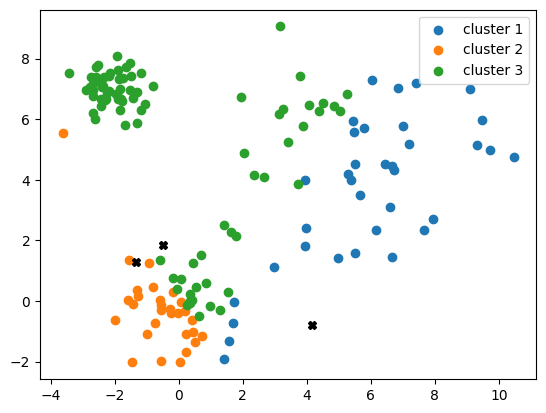

In [ ]:
# случайные координаты для центров кластеров
centroids = np.random.normal(loc=0.0, scale=2., size=6).reshape((3, 2))

labels = kmeans_predict(X, centroids)
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], label='cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], label='cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], label='cluster 3')
plt.plot(centroids[:, 0], centroids[:, 1], 'kX')
plt.legend()
plt.show()

### 2
Напишите код для обновления центров кластеров. Запоминайте центры кластеров для дальнейшей визуализации.

In [ ]:
centroids = np.random.normal(loc=0.0, scale=2., size=6).reshape((3, 2))
k = len(centroids)
centroids_history = [centroids] # история центров кластеров

iters = 7 # количество шагов итерации обновления центров кластеров

for i in range(iters):
    labels = kmeans_predict(X, centroids_history[-1])
    new_centroids = np.empty(centroids.shape)
    for j in range(len(centroids)):
        cluster = X[labels == j]
        new_centroids[j] = cluster.mean(axis=0)
    centroids_history.append(new_centroids)

Посмотрим на результат.

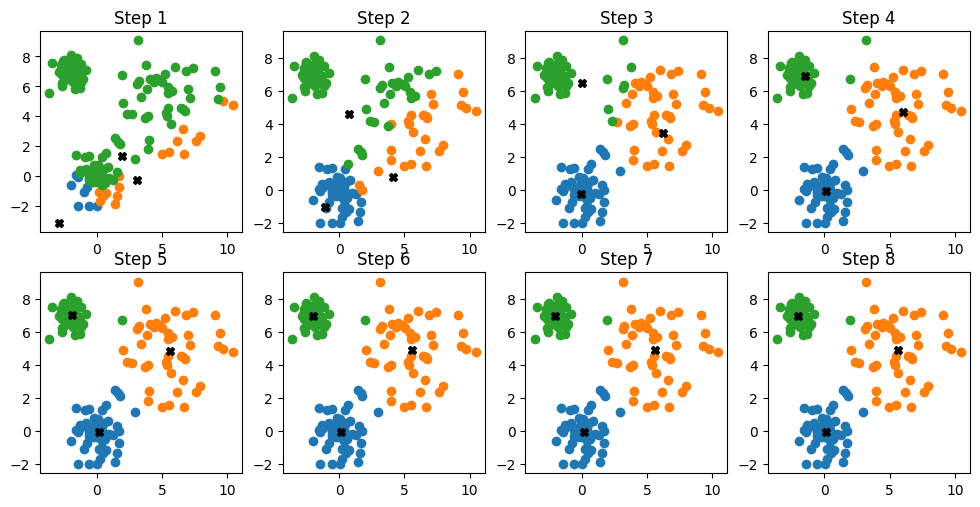

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(iters + 1):
    labels = kmeans_predict(X, centroids_history[i])
    plt.subplot((iters + 1) // 2, (iters + 1) // 2, i + 1)
    plt.scatter(X[labels == 0, 0], X[labels == 0, 1], label='cluster 1')
    plt.scatter(X[labels == 1, 0], X[labels == 1, 1], label='cluster 2')
    plt.scatter(X[labels == 2, 0], X[labels == 2, 1], label='cluster 3')
    plt.plot(centroids_history[i][:, 0], centroids_history[i][:, 1], 'kX')
    # plt.legend()
    plt.title('Step {:}'.format(i + 1))

### 3

Напишите функцию обучения kMeans. Параметры:

* k - кол-во кластеров,
* max_iter - через сколько итераций нужно остановиться,
* tol - если сумма расстояний между прошлыми центрами кластеров и новыми центрами меньше tol (для всех кластеров!), то остановиться,
* low и high - это минимально и максимально значение, которое могут принимать точки центров кластеров при генерации.



Начните с генерации центров кластеров с помощью np.random.uniform. Затем на каждой итерации нужно сделать следующее:
* определить, к какому кластеру относится каждая точка,
* по точкам в кластере пересчитать центр кластера, если точек в кластере нет - сгенерировать новый случайный центр,
* посчитать loss как сумму расстояний (euclidean) между кластерами, полученными на прошлой итерации, и новыми кластерами.

In [ ]:
def get_inertia(X, X_labels, centroids):
    inertia = 0
    for cluster_idx in range(centroids.shape[0]):
        cluster = X[X_labels == cluster_idx]
        if cluster.shape[0] != 0:
            centroid = [centroids[cluster_idx]]
            distances = cdist(cluster, centroid)
            inertia += (distances**2).sum()
    return inertia

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist


def kmeans_fit_predict(X, k=8, max_iter=100, tol=0.001, low=0.0, high=1.0, print_progress=False):
    init_centroids = np.random.uniform(low, high, size=(k, X.shape[1]))
    centroids_history = [init_centroids]
    init_loss= get_inertia(X, kmeans_predict(X, init_centroids), init_centroids)
    loss_history = [init_loss]

    if print_progress:
        print(f'iter INIT: centroids: {init_centroids.tolist()}, loss: {init_loss}')

    for i in range(max_iter):
        X_labels = kmeans_predict(X, centroids_history[-1])

        # обновляем центроиды:
        new_centroids = np.empty(init_centroids.shape)
        for cluster_idx in range(k):
            cluster = X[X_labels == cluster_idx]
            if cluster.size == 0: # если у цетноида не образуется кластер
                new_centroids[cluster_idx] = np.random.uniform(low, high, size=X.shape[1])
            else:
                new_centroids[cluster_idx] = cluster.mean(axis=0)
        centroids_history.append(new_centroids)

        # находим loss как inertia:
        inertia = get_inertia(X, X_labels, new_centroids)
        loss_history.append(inertia)

        # проверим tolerance
        dist_new_old_centroids = cdist(centroids_history[-1], centroids_history[-2]).diagonal()
        tolerance = dist_new_old_centroids.sum()

        if print_progress:
            print(f'iter {i}: centroids: {new_centroids.tolist()}, loss: {inertia}, tol: {tolerance}')

        if tolerance < tol:
            if print_progress:
                print(f'STOP on iter {i}: tolerance {tolerance} < tol {tol}')
            break

    return centroids_history[-1], X_labels, loss_history

Проверим работу функции.

In [ ]:
centroids, labels, loss_history = kmeans_fit_predict(X, k=3, low=0.0, high=np.max(X), print_progress=True)

iter INIT: centroids: [[6.563534899180788, 5.419319395818812], [4.215100033096547, 1.16322203030245], [0.9319396004521688, 8.81619620163048]], loss: 1997.2690491516846
iter 0: centroids: [[6.402446315561637, 5.323033261820128], [0.8250498273804217, 0.3818853223986488], [-1.5655788791053007, 6.956675281026032]], loss: 690.7494526560988, tol: 6.780343978453365
iter 1: centroids: [[5.844179005933736, 5.06484409233119], [0.32701206723646337, 0.09524748971730793], [-1.9420506987880466, 6.934409824286874]], loss: 524.3355438255645, tol: 1.5668429759449727
iter 2: centroids: [[5.603877253556759, 4.911922610754059], [0.1513164598289027, -0.05693320171131916], [-2.019932712883574, 6.974816505117842]], loss: 494.4016919365033, tol: 0.6050121760290295
iter 3: centroids: [[5.603877253556759, 4.911922610754059], [0.1513164598289027, -0.05693320171131916], [-2.019932712883574, 6.974816505117842]], loss: 494.4016919365033, tol: 0.0
STOP on iter 3: tolerance 0.0 < tol 0.001


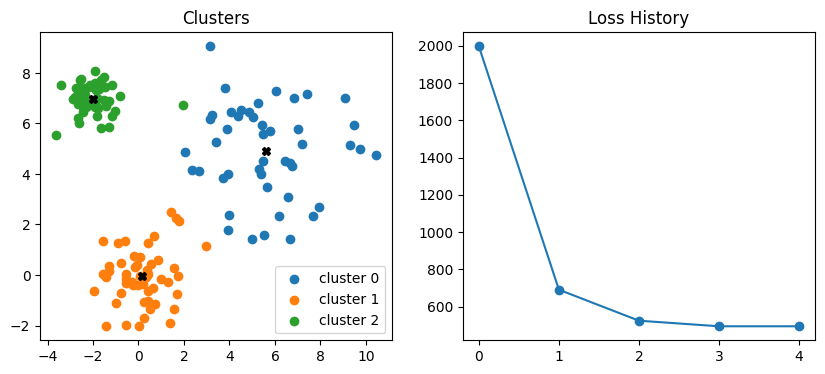

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'cluster {i}')
# plt.scatter(X[labels == 1, 0], X[labels == 1, 1], label='cluster 2')
# plt.scatter(X[labels == 2, 0], X[labels == 2, 1], label='cluster 3')
plt.plot(centroids[:, 0], centroids[:, 1], 'kX')
plt.title('Clusters')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_history, marker='o')
plt.title('Loss History')

plt.show()